In [1]:
def feature_normalization(train):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
    Returns:
        train_normalized - training set after normalization

    """
    mins_train = np.min(train, axis=0)
    maxs_train = np.max(train, axis=0)
    rng_train = maxs_train - mins_train
    train_normalized = (train-mins_train)/rng_train
    print('Normalization finish!')
    return train_normalized

In [7]:
import numpy as np
from scipy.optimize import minimize

X = np.loadtxt("/Users/twff/Downloads/machine learning/hw/hw2-lasso/data/X_train.txt")
y = np.loadtxt("/Users/twff/Downloads/machine learning/hw/hw2-lasso/data/y_train.txt")
X_valid = np.loadtxt("/Users/twff/Downloads/machine learning/hw/hw2-lasso/data/X_valid.txt")
y_valid = np.loadtxt("/Users/twff/Downloads/machine learning/hw/hw2-lasso/data/y_valid.txt")

In [5]:
X_train = feature_normalization(X)
X_valid = feature_normalization(X_valid)

Normalization finish!
Normalization finish!


In [8]:
(N,D) = X_train.shape

w = np.random.rand(D,1)

def ridge(Lambda):
    def ridge_obj(theta):
        return ((np.linalg.norm(np.dot(X, theta) - y))**2)/(2*N) + Lambda*(np.linalg.norm(theta))**2
    return ridge_obj

def compute_loss(X, y, Lambda, theta):
    (N,D) = X.shape
    return ((np.linalg.norm(np.dot(X, theta) - y))**2)/(2*N)

for i in range(-12,6):
    Lambda = 10**i;
    w_opt = minimize(ridge(Lambda), w)
    print(Lambda, compute_loss(X_valid, y_valid, Lambda, w_opt.x))
    


1e-12 0.0587411740074
1e-11 0.0587404779573
1e-10 0.0587400361188
1e-09 0.0587394466821
1e-08 0.0587476536261
1e-07 0.0588260621383
1e-06 0.0596279314919
1e-05 0.0693703648818
0.0001 0.212609358879
0.001 1.53716628641
0.01 6.71421847418
0.1 19.9767938946
1 31.131192405
10 197.027940218
100 619.548850394
1000 731.586308781
10000 744.446029368
100000 745.750725135


1e-05 0.100575155982

In [22]:
w_opt = minimize(ridge(1e-5), w)
len(w_opt.x[w_opt.x==0])

0

In [21]:
len(w_opt.x[w_opt.x <= 0.001])

50

In [24]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1e-5)
clf.fit(X, y)
a = clf.predict(X)#numpy.dot(X,theta)
a =((np.linalg.norm(a - y))**2)/(2*N)
b = compute_loss(X_valid, y_valid, Lambda, w_opt.x)
b


0.10057515598174918

In [102]:
def lassoShooting(X, y, lambda_reg, w, ep = 1e-6, iter_max=1000):
    (n,p) = X.shape
    converge = True
    itera = 0
    
    while converge and (itera + 1) <= iter_max:
        w_old = w.copy()
        for j in range(p):
            a = []
            c = []
            for i in range(n):
                aj = 2 * X[i,j]*X[i,j]
                cj = 2 * X[i,j]*(y[i]-np.dot(w.T,X[i]) + X[i,j]*w[j])
                a.append(aj)
                c.append(cj)
            aj_sum = sum(a)
            cj_sum = sum(c)
            w[j] = soft(cj_sum/aj_sum, lambda_reg/aj_sum)
        converge = (sum(abs(w-w_old)) >= ep)
        #print(sum(abs(w-w_old)))
        itera +=1
    print(itera)
    return w

def soft(a, b):
    if a <- b:
        c = a+b
    elif a > b:
        c = a - b
    else:
        c = 0
    return c

1000
1e-05 0.918811698745
1000
0.0001 0.605207267911
1000
0.001 0.0930107899278
1000
0.01 0.0367527183921
603
0.1 0.0168906403666
216
1 0.00975489806724
267
10 0.221374192341


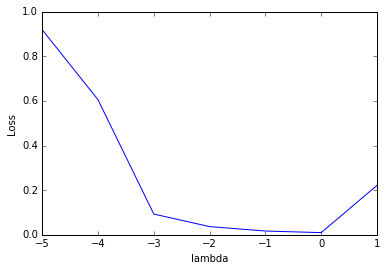

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

w = np.zeros(X.shape[1])
loss = []
for i in range(-5,2):
    Lambda = 10**i;
    w_opt = lassoShooting(X, y, lambda_reg=Lambda, w=w, ep=1e-3)
    loss.append(compute_loss(X_valid, y_valid, Lambda, w_opt))
    print(Lambda, compute_loss(X_valid, y_valid, Lambda, w_opt))

plt.plot(range(-5,2), loss)
plt.xlabel("lambda")
plt.ylabel("Loss")
plt.savefig("/Users/twff/Downloads/machine learning/hw/hw2-lasso/img311a")

1000
1e-05 0.918811698745
1000
0.0001 0.605207267911
1000
0.001 0.0930107899278
1000
0.01 0.0367527183921
603
0.1 0.0168906403666
216
1 0.00975489806724
267
10 0.221374192341


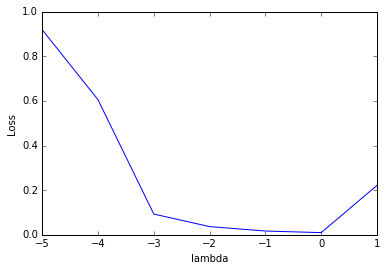

In [103]:
w = np.zeros(X.shape[1])
loss = []
for i in range(-5,2):
    Lambda = 10**i;
    w_opt = lassoShooting(X, y, lambda_reg=Lambda, w=w, ep=1e-3)
    loss.append(compute_loss(X_valid, y_valid, Lambda, w_opt))
    print(Lambda, compute_loss(X_valid, y_valid, Lambda, w_opt))

plt.plot(range(-5,2), loss)
plt.xlabel("lambda")
plt.ylabel("Loss")

2000
0.0 0.608928505664
2000
0.111111111111 0.0156058749167
2000
0.222222222222 0.0092999207829
2000
0.333333333333 0.00884878864898
2000
0.444444444444 0.00867424750337
2000
0.555555555556 0.00900410321402
2000
0.666666666667 0.00811654625535
2000
0.777777777778 0.00935841550302
2000
0.888888888889 0.0103874108549
2000
1.0 0.00844747354922


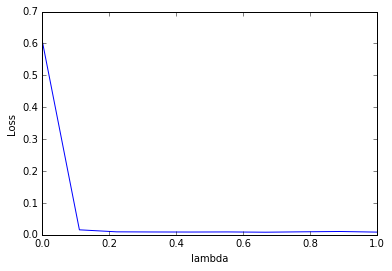

In [37]:
w = np.zeros(X.shape[1])
lambda_reg = np.linspace(0,1,10)
loss = []
for i in range(len(lambda_reg)):
    w_opt = lassoShooting(X, y, lambda_reg=lambda_reg[i], w=w, ep=1e-3)
    loss.append(compute_loss(X_valid, y_valid, lambda_reg[i], w_opt))
    print(lambda_reg[i], compute_loss(X_valid, y_valid, lambda_reg[i], w_opt))

plt.plot(lambda_reg, loss)
plt.xlabel("lambda")
plt.ylabel("Loss")
plt.savefig("/Users/twff/Downloads/machine learning/hw/hw2-lasso/img311b")

In [33]:
X_test = np.loadtxt('/Users/twff/Downloads/machine learning/hw/hw2-lasso/data/X_test.txt')
y_test = np.loadtxt('/Users/twff/Downloads/machine learning/hw/hw2-lasso/data/y_test.txt')

In [35]:
w = np.zeros(X.shape[1])
w_opt = lassoShooting(X, y, lambda_reg=0.4, w=w, ep=1e-3)
compute_loss(X_test, y_test, 0.4 ,w_opt)

2000


0.0093066225296064235

In [38]:
w = np.zeros(X.shape[1])
w_opt = lassoShooting(X, y, lambda_reg=0.4, w=w, ep=1e-3)
len(w_opt[w_opt<=1e-3])

2000


51

In [105]:
def lassoShooting_homotopy(X, y, threshold = 1e-3, pa=0.5, iter_max=1000):
    lambda_max = 2 * np.linalg.norm(np.dot(X.T, y), np.inf)
    (n,p) = X.shape
    converge = True
    itera = 0
    lambda_reg = lambda_max - 1
    lambda_old = 0
    lambda_list = []
    loss = []
    w = np.zeros(p)
    
    while np.abs(lambda_old - lambda_reg)>threshold:
        w_prev = w.copy()
        w_new = lassoShooting(X, y, lambda_reg, w, ep = 1e-3, iter_max=iter_max)
        loss.append(compute_loss(X_valid, y_valid, lambda_reg, w_new))
        lambda_list.append(lambda_reg)
        if(sum(abs(w_prev-w_new)) < threshold):
            break
        w = w_new.copy()
        lambda_reg = pa*lambda_reg
    
    min_index = np.argmin(loss)
    lambda_opt = lambda_list[min_index]
    return lambda_list, loss

In [115]:
Lambda, loss= lassoShooting_homotopy(X, y, 1e-3, pa=0.5)

2
56
312
321
259
254
242
286
249
208
197
195
191
176
140
273
620
348
317
465
428
360


In [41]:
Lambda, loss

([1000, 100.0, 10.0, 1.0, 0.1, 0.010000000000000002, 0.0010000000000000002],
 [516.83346386019207,
  22.266295363802776,
  0.32600874662777535,
  0.012101230499456666,
  0.017018782604924364,
  0.0399054106771876,
  0.047742464547626311])

In [106]:
import timeit

w = np.zeros(X.shape[1])
start = timeit.default_timer()
w_opt = lassoShooting_homotopy(X, y,1e-3, pa=0.5)
stop = timeit.default_timer()
print("Homotopy time is {}".format(stop-start))


2
56
312
321
259
254
242
286
249
208
197
195
191
176
140
273
620
348
317
465
428
360
Homotopy time is 124.1882728970013


In [100]:

start = timeit.default_timer()
for i in range(len(Lambda)):
    w = np.zeros(X.shape[1])
    w_opt = lassoShooting(X, y, lambda_reg=Lambda[i], w=w, ep=1e-3)
    
stop = timeit.default_timer()
print("Regular time is {}".format(stop-start))

2
56
341
369
320
340
387
409
450
543
749
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Regular time is 302.8984123150003


In [117]:
start = timeit.default_timer()
for i in range(len(Lambda)):
    w = np.zeros(X.shape[1])
    w_opt = lassoShooting_matrix(X, y, lambda_reg=Lambda[i], w=w, ep=1e-3)
    
stop = timeit.default_timer()
print("Regular time is {}".format(stop-start))

Regular time is 9.962034545998904


In [109]:
def lassoShooting_matrix(X, y, lambda_reg, w, ep = 1e-3, iter_max=500):
    (n,p) = X.shape
    w_opt = w
    converge = True
    itera = 0
    
    while converge and (itera+1) <= iter_max:
        w_old = w.copy()
        a = np.dot(X.T, X)
        for j in range(p):
            a = 2*X[:,j].dot(X[:,j])
            c = 2*X[:,j].dot(y) - 2* X.dot(w).dot(X[:,j]) +  2*X[:,j].dot(X[:,j])*w[j]
            w[j] = soft(c/a, lambda_reg/a)
        converge = (sum(abs(w-w_old)) >= ep)
        #print(sum(abs(w-w_old)))
        itera +=1
    return w

In [107]:
start = timeit.default_timer()
w = np.zeros(X.shape[1])
w_opt = lassoShooting(X, y, 0.4, w=w, ep=1e-3)  
stop = timeit.default_timer()
print("Regular time is {}".format(stop-start))

1000
Regular time is 20.220894887999748


In [112]:
w = np.zeros(X.shape[1])

In [113]:
start = timeit.default_timer()

w_opt = lassoShooting_matrix(X, y, 0.4, w=w, ep=1e-3)  
stop = timeit.default_timer()
print("Vectorization time is {}".format(stop-start))

Vectorization time is 0.46611224899970694
